In [314]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium

In [315]:
pd_data = pd.read_csv('pd_data_clean')
pd_data = pd_data.dropna(subset=['Location'])
pd_data.head()

,Unnamed: 0,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,THEME,SERIOUS,DIST_FROM_NU,MILES_FROM_NU
0,0,3115,0,2023-01-27 22:44:00+00,2023,1,Friday,22,NaN,FAVRE ST,42.271661,-71.099535,"(42.271661031027065, -71.09953455161765)",REPORT,0,4.735747,4.735747
1,1,3301,0,2023-01-17 20:21:00+00,2023,1,Tuesday,20,NaN,HAROLD ST,42.312596,-71.092876,"(42.3125962960786, -71.09287583752645)",NOISY,0,1.890701,1.890701
2,2,3115,0,2023-01-24 00:00:00+00,2023,1,Tuesday,0,NaN,HANOVER ST,42.365699,-71.052892,"(42.3656993584582, -71.05289203191269)",REPORT,0,2.600130,2.600130
3,3,3114,0,2023-03-31 17:14:00+00,2023,3,Friday,17,NaN,BLUE HILL AVE,42.292788,-71.088520,"(42.29278799134922, -71.08851953962399)",REPORT,0,3.252513,3.252513
4,4,423,0,2023-01-26 09:00:00+00,2023,1,Thursday,9,NaN,HUTCHINGS ST,42.310269,-71.089311,"(42.310268910354935, -71.08931055058088)",ASSAULT,1,2.045410,2.045410


In [316]:
def get_point(loc):
    loc = str(loc)
    loc = loc.strip("()").split(',')
    lat, long = map(float, loc)
    point = Point(long, lat)
    return point

In [317]:
pd_data['Coordinates'] = pd_data['Location'].apply(get_point)
gdf = gpd.GeoDataFrame(pd_data, geometry='Coordinates')

In [318]:
boston_bg = gpd.read_file('2020_Census_Block_Groups_in_Boston.shp')

In [319]:
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs('EPSG:26986')
boston_bg = boston_bg.set_crs('EPSG:2249', allow_override=True)
boston_bg = boston_bg.to_crs('EPSG:26986')

In [320]:
print(gdf.crs)  # Check CRS of the GeoDataFrame
print(boston_bg.crs)

EPSG:26986
EPSG:26986


In [327]:
joined_gdf = gpd.sjoin(gdf, boston_bg, how='right', predicate='within')

In [341]:
joined_gdf['geometry2'] = joined_gdf['geometry']

In [350]:
to_map = pd.DataFrame(joined_gdf.groupby('geometry2')['SERIOUS'].sum())
to_map['geometry'] = to_map.index
to_map = to_map.set_geometry('geometry')

In [351]:
to_map.head()

,SERIOUS,geometry
geometry2,,
"POLYGON ((226640.688 892264.489, 226761.725 89...",76,"POLYGON ((226640.688 892264.489, 226761.725 89..."
"POLYGON ((227008.613 891284.983, 227037.343 89...",69,"POLYGON ((227008.613 891284.983, 227037.343 89..."
"POLYGON ((227528.735 891077.066, 227541.693 89...",11,"POLYGON ((227528.735 891077.066, 227541.693 89..."
"POLYGON ((227762.501 890290.571, 227767.443 89...",35,"POLYGON ((227762.501 890290.571, 227767.443 89..."
"POLYGON ((227442.302 890245.551, 227464.497 89...",15,"POLYGON ((227442.302 890245.551, 227464.497 89..."


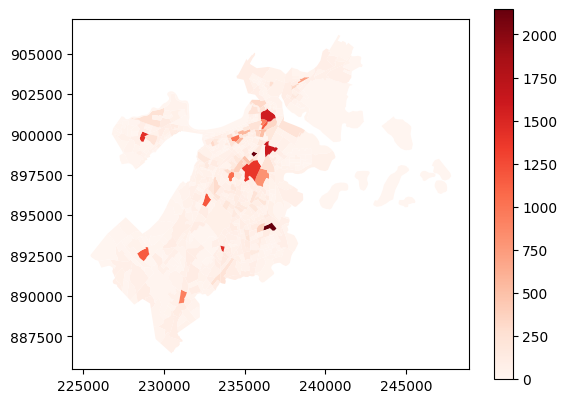

In [357]:
import matplotlib.pyplot as plt

#base = boston_bg.plot(color='lightgrey', edgecolor='black')
to_map.plot(column = 'SERIOUS', cmap = 'Reds', legend = True)
plt.show()
